In [78]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [79]:
x.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)
x.grad  # 默认值是None

In [80]:
y = 2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [81]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [82]:
x.grad.zero_()
y = x.sum()
print(y)
y.backward()
x.grad

tensor(6., grad_fn=<SumBackward0>)


tensor([1., 1., 1., 1.])

In [83]:
x.grad.zero_()
y = x*x
print(y)
y.sum().backward()
x.grad

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)


tensor([0., 2., 4., 6.])

In [84]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [85]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x, x.grad

(tensor([True, True, True, True]), tensor([0., 2., 4., 6.]))

In [86]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b*2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [102]:
a = torch.randn(size=(3,1), requires_grad=True)
d = f(a)
d.sum().backward()
a.grad == d / a

tensor([[True],
        [True],
        [True]])

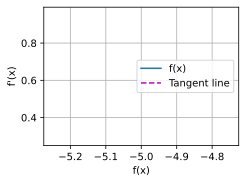

In [103]:
x = torch.linspace(-5,-5,10)
x.requires_grad_(True)
y = torch.sin(x)
y.sum().backward()
y = y.detach()

from d2l.torch import d2l
d2l.plot(x.detach(), [y, x.grad], 'f(x)', "f'(x)", legend = ['f(x)', 'Tangent line'])
d2l.plt.show()


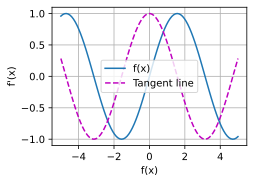

In [111]:
x = torch.linspace(-5, 5, 100)
x.requires_grad_(True)
y = torch.sin(x)
y.backward(torch.ones_like(x))
y = y.detach()
import d2l.torch as dt

dt.plot(x.detach(), [y, x.grad], 'f(x)', "f'(x)", legend=['f(x)', 'Tangent line'])
dt.plt.show()

In [1]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [2]:
fair_probs = torch.ones([6]) / 6
print(fair_probs)
multinomial.Multinomial(1, fair_probs).sample()

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])


tensor([1., 0., 0., 0., 0., 0.])

In [3]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 2., 1., 2., 2., 2.])

In [153]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1650, 0.1500, 0.1910, 0.1750, 0.1550, 0.1640])

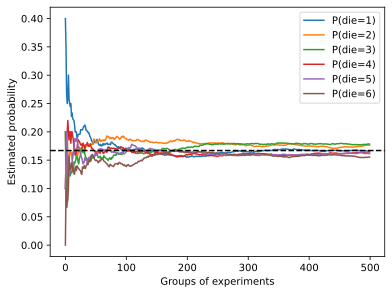

In [4]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weibull', '__all__', '__builtins__', '__cached__', '__doc__'

In [ ]:
fair_probs = torch.ones([6]) / 6
print(fair_probs)
multinomial.Multinomial(1, fair_probs).sample()

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])


tensor([1., 0., 0., 0., 0., 0.])